In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading data files
train = pd.read_csv(r'D:\Data Science\Black Friday sales\train.csv')
test = pd.read_csv(r'D:\Data Science\Black Friday sales\test.csv')
sample = pd.read_csv(r'D:\Data Science\Black Friday sales\sample.csv')

In [5]:
#1. Brief look at the dataset
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Hypothesis Generation

1. Category of products which are bought the most will increase the purchase price.
2. Females purchase price will be much higher compared to males.
3. Product category will be according to city category.

In [4]:
#Brief look at the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [5]:
#2. Shape of the data
print('Rows in train data are :', train.shape[0])
print('columns in train data are :', train.shape[1])

print('Rows in test data are :', test.shape[0])
print('columns in test data are :', test.shape[1])

Rows in train data are : 550068
columns in train data are : 12
Rows in test data are : 233599
columns in test data are : 11


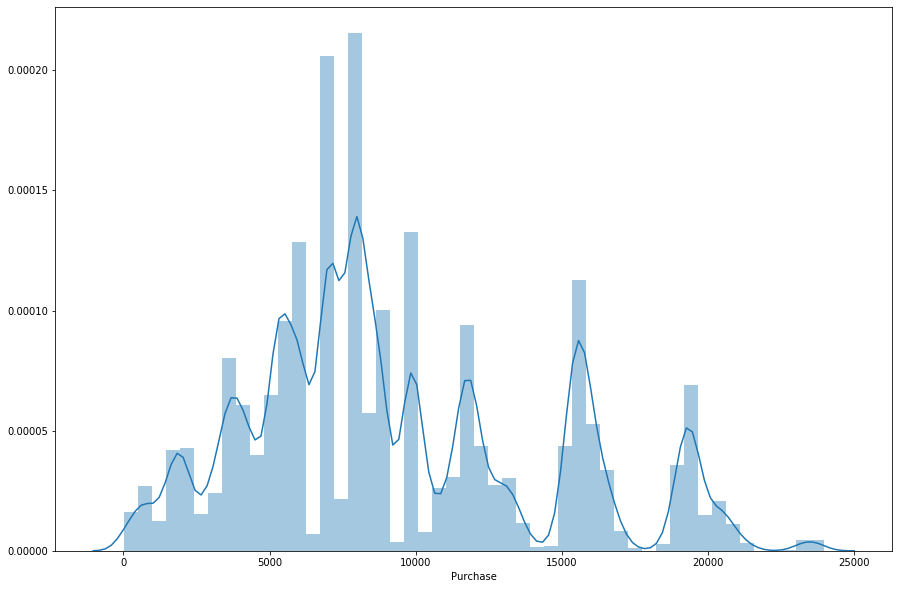

In [6]:
#3.Target Distribution
plt.figure(figsize = (15,10))
sns.distplot(train['Purchase'])

In [7]:
#Unique values
pd.concat((train.nunique(), test.nunique()), axis =1, sort = False)

,0,1
User_ID,5891,5891.0
Product_ID,3631,3491.0
Gender,2,2.0
Age,7,7.0
Occupation,21,21.0
City_Category,3,3.0
Stay_In_Current_City_Years,5,5.0
Marital_Status,2,2.0
Product_Category_1,20,18.0
Product_Category_2,17,17.0


In [8]:
#Datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
#Missing values
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

---

In [10]:
#Dropping Product_Category_3 column because it has very large number of missing values. 

# train.drop('Product_Category_3', axis = 1, inplace = True)
# test.drop('Product_Category_3', axis = 1, inplace = True)

In [11]:
cat_cols = [col for col in train.columns if col not in ['User_ID', 'Product_ID','Purchase']]
target = 'Purchase'

## Univariate Analysis

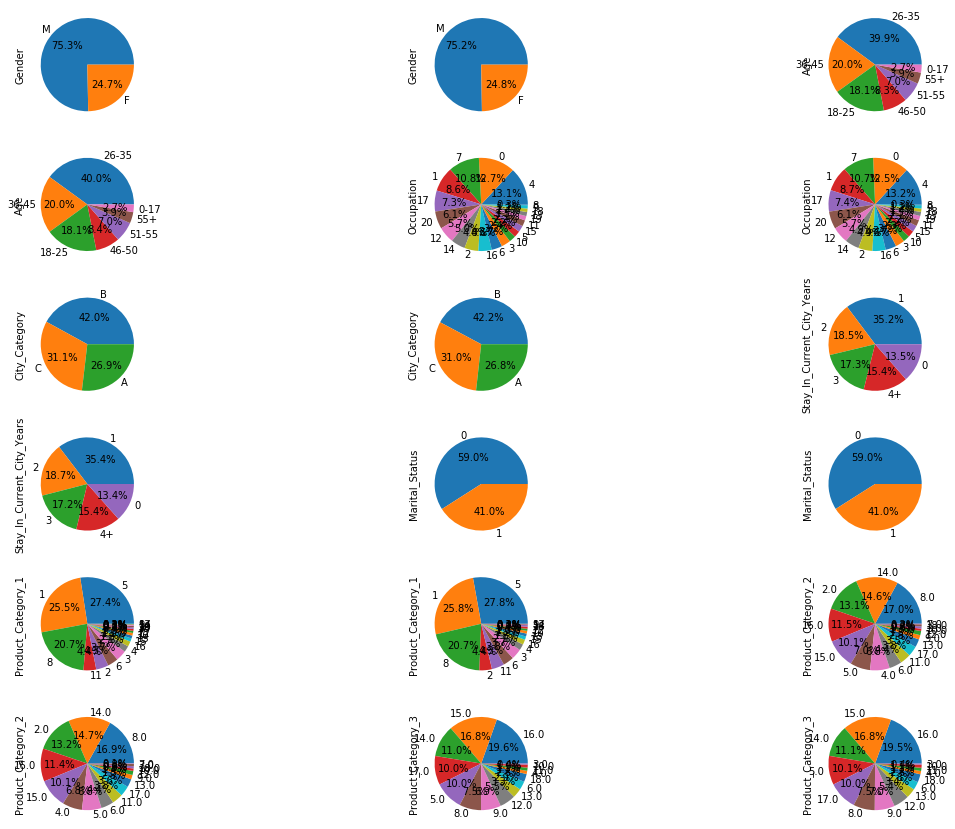

In [21]:
f, ax = plt.subplots(6,3, figsize = (20,15))
axx = ax.flatten()
index = 0

for col in cat_cols:
    train[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])
    index+=1
    test[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])
    index+=1

### Product Categories which are bought by most number of customers feature idea
Product_Category_1 = [5,1,8]

Product_Category_2 - [8,14,2,16,15]

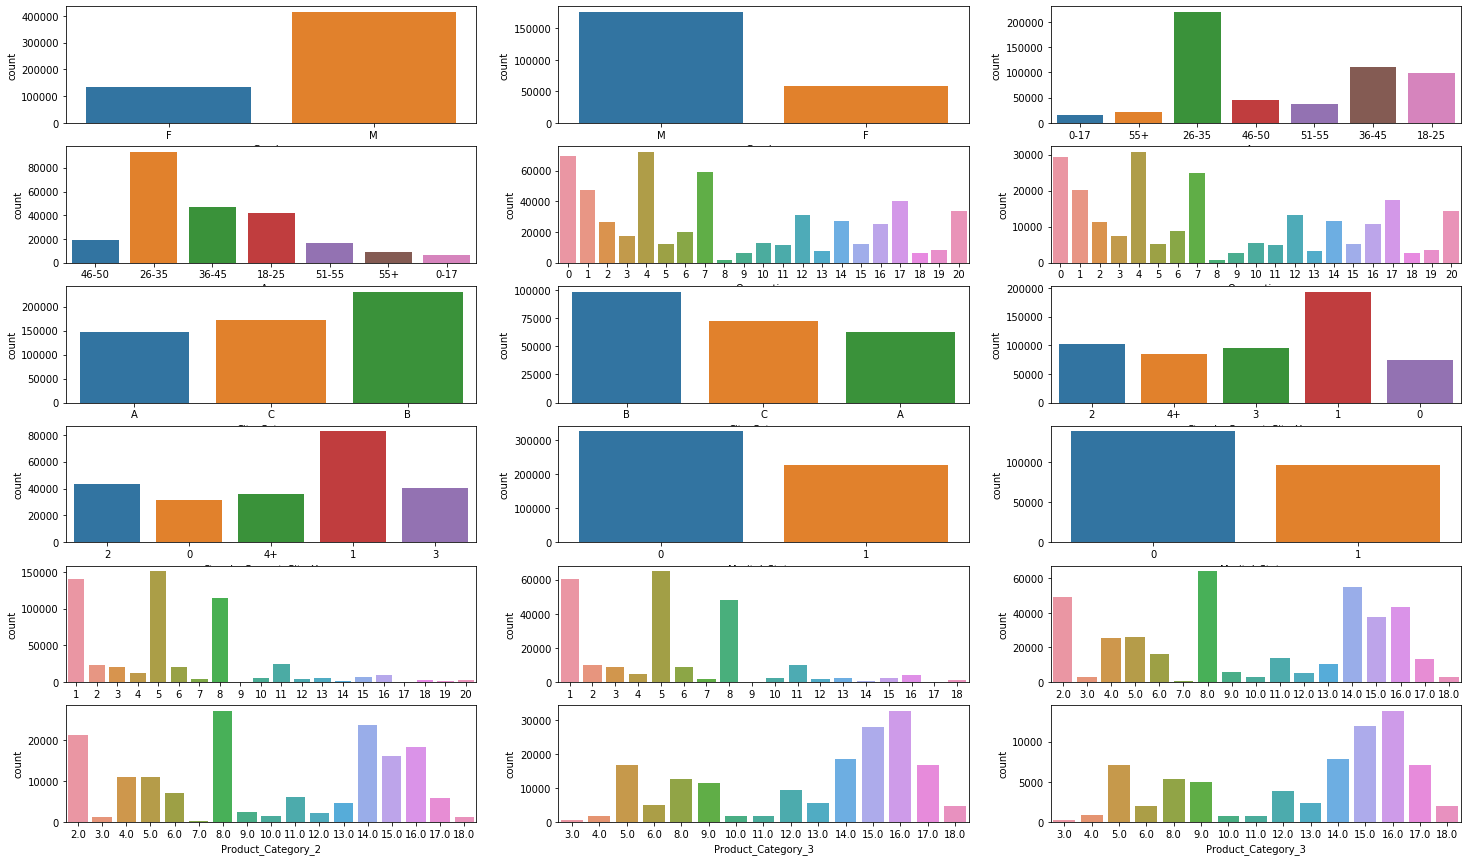

In [17]:
f, ax = plt.subplots(6,3, figsize = (25,15))
axx = ax.flatten()
index = 0

for col in cat_cols:
    sns.countplot(train[col], ax = axx[index])
    index+=1
    sns.countplot(test[col], ax = axx[index])
    index+=1

In [63]:
# # Inights
# #Famous_occ = [3,5,6,8,9,10,11,13,15,18,19]
# train.groupby(['Marital_Status','Occupation'])['Purchase'].median()>8500
#train.groupby('Occupation')['Purchase'].median() > 8300
#high_purchase_occ = [8,12,15,17]
#train.groupby('Occupation')['Purchase'].median()<8000
#low_buyers = [1,2,9,18,19,20]
# train.groupby('City_Category')['Product_Category_2'].value_counts()

City_Category  Product_Category_2
A              8.0                   17367
               14.0                  15288
               2.0                   11981
               16.0                  11547
               15.0                   9341
               5.0                    6841
               4.0                    6313
               6.0                    4378
               11.0                   3668
               17.0                   3328
               13.0                   2857
               12.0                   1589
               9.0                    1480
               10.0                    780
               18.0                    712
               3.0                     710
               7.0                     181
B              8.0                   26728
               14.0                  23078
               2.0                   20170
               16.0                  18014
               15.0                  15565
               5.0  

In [49]:
train.groupby(['Marital_Status', 'Occupation','Age'])['Purchase'].median()

Marital_Status  Occupation  Age  
0               0           0-17      8091.0
                            18-25     8021.0
                            26-35     7986.0
                            36-45     8081.0
                            46-50     7965.5
                            51-55     7590.0
                            55+       8107.0
                1           0-17      7900.0
                            18-25     7918.0
                            26-35     7938.0
                            36-45     8018.0
                            46-50     7981.5
                            51-55     8056.0
                            55+       8006.0
                2           0-17      7157.0
                            18-25     7433.5
                            26-35     8039.0
                            36-45     8045.0
                            46-50     8344.0
                            51-55     7865.0
                            55+       7930.0
                3    

## Bivariate Analysis

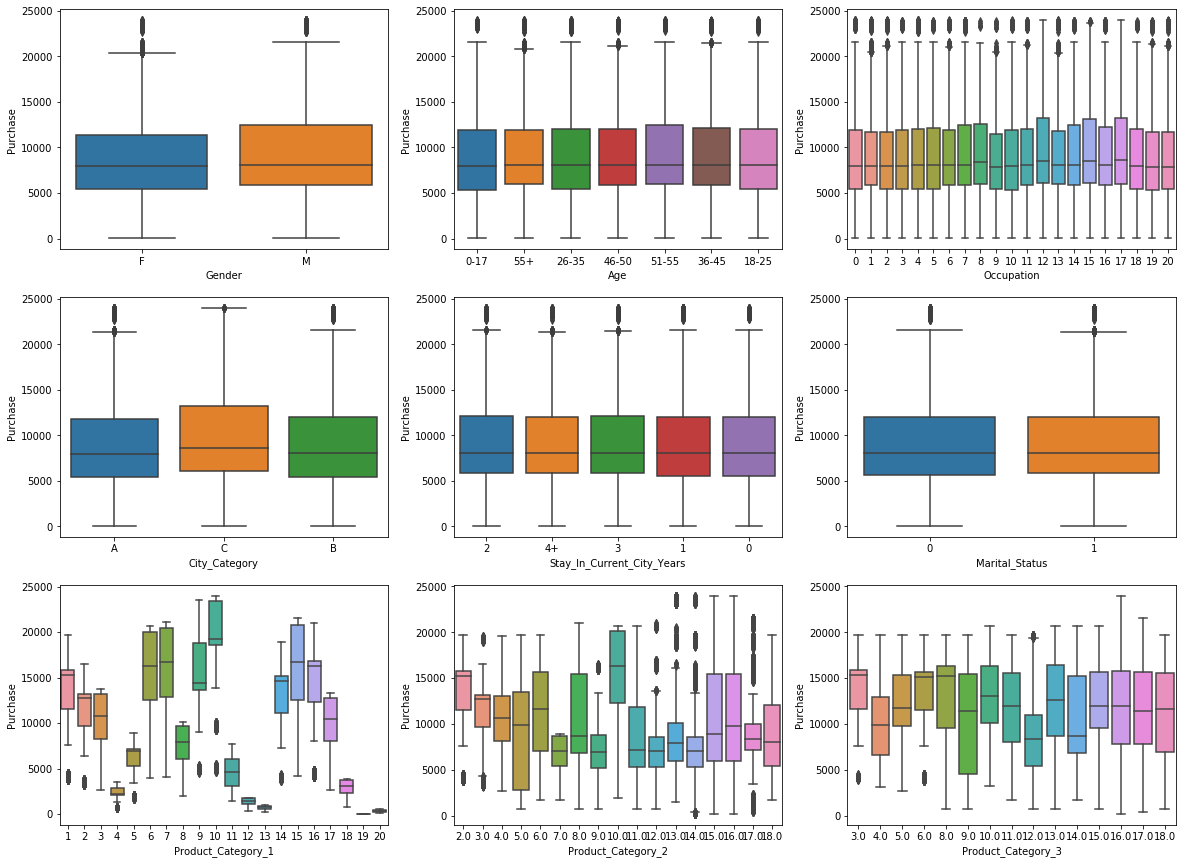

In [24]:
f, ax = plt.subplots(3,3,figsize = (20,15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    sns.boxplot(x = train[col], y = train[target], ax = axx[index])

### Expensive product category feature idea

CHEAP PRODUCT CATEGORIES

Product_1 = [4,5,8,11,12,13,18,19,20]

Product_2 = [7.0,9.0,12.0,14.0,17.0]

EXPENSIVE PRODUCT CATEGORIES

Product_1 = [9,10,14,16]


## Multivariate Analysis

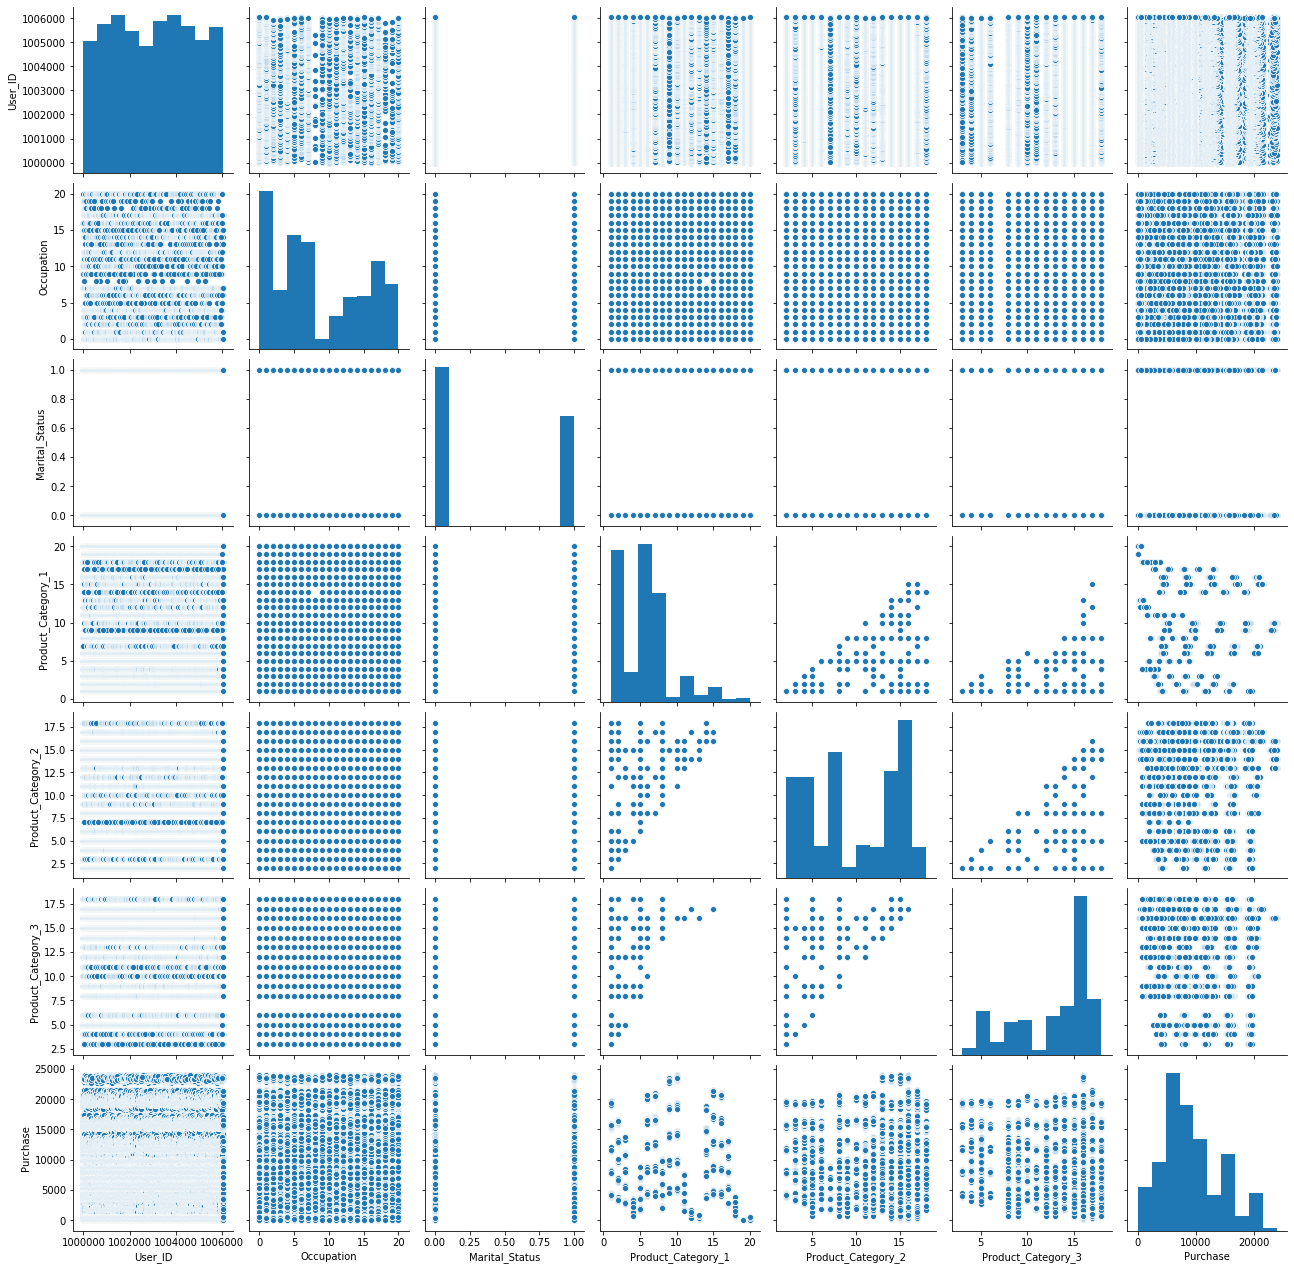

In [25]:
sns.pairplot(train)

In [6]:
df = pd.concat([train, test], axis = 0, sort  = False)
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [9]:
df[df.duplicated(subset = ['User_ID','Product_ID'], keep = False)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
